# Ejercicio *k-Nearest Neighbor*

## *App Reviews*
En este ejercicio vas a trabajar con una base de datos de *reviews* de una aplicación. Entre los datos podemos encontrar el texto de la *review*, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el *rating*, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo *KNN*.

## Importamos las librerías que vamos a utilizar

In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix


## Leemos nuestro archivo de entrada `reviews_sentiment`

In [32]:
df=pd.read_csv('./data/reviews_sentiment.csv', sep=';')
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


In [33]:
df['Star Rating'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


Para facilitar el ejercicio, las columnas que utilizaremos serán: *wordcount* con la cantidad de palabras utilizadas y *sentimentValue* con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo.

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del *rating*. Realiza otras visualizaciones para ver la relación de tus datos.

Nube de palabras con los titulos:

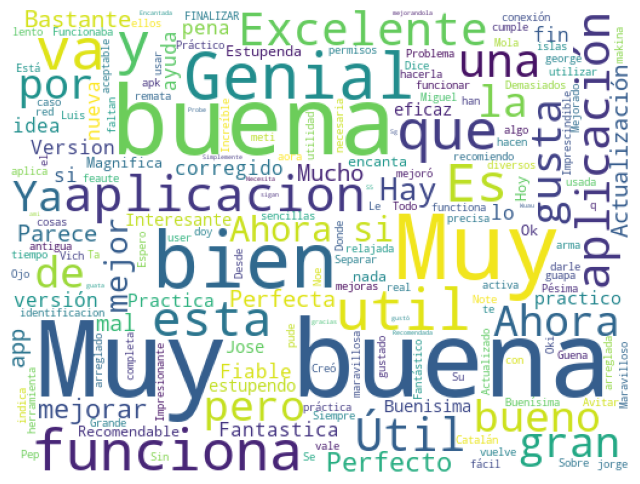

In [40]:
datos_1=df['Review Title']

plt.figure(figsize=(8,8))
nube=WordCloud(background_color='white',
               width=512,
               height=384).generate(",".join(datos_1))

plt.imshow(nube)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Nube de palabras con las descripciones (con los titulos es mas util ya que las descripciones son mas largas y es normal que se repitan palabras como: el, lo, las...)

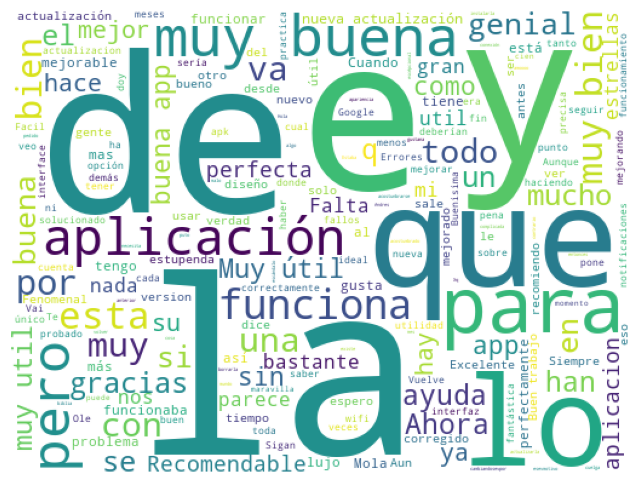

In [41]:
datos_1=df['Review Text']

plt.figure(figsize=(8,8))
nube=WordCloud(background_color='white',
               width=512,
               height=384).generate(",".join(datos_1))

plt.imshow(nube)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

array([[<Axes: title={'center': 'wordcount'}>,
        <Axes: title={'center': 'Star Rating'}>],
       [<Axes: title={'center': 'sentimentValue'}>, <Axes: >]],
      dtype=object)

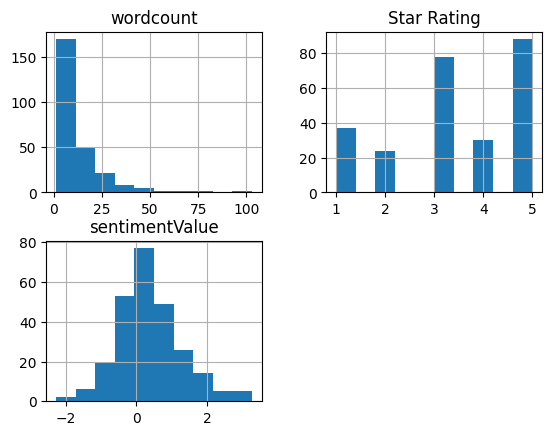

In [35]:
df.hist()

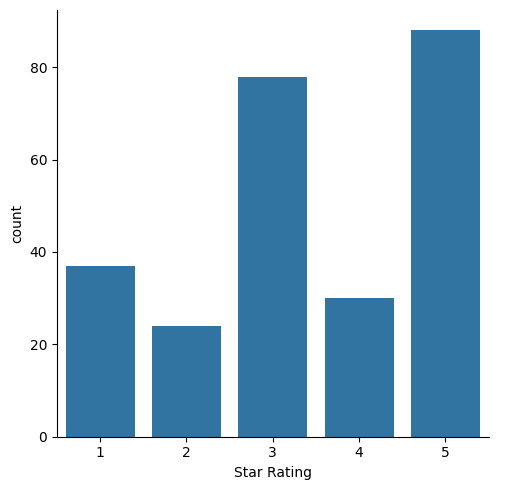

In [6]:
sns.catplot(x='Star Rating', data=df, kind='count')

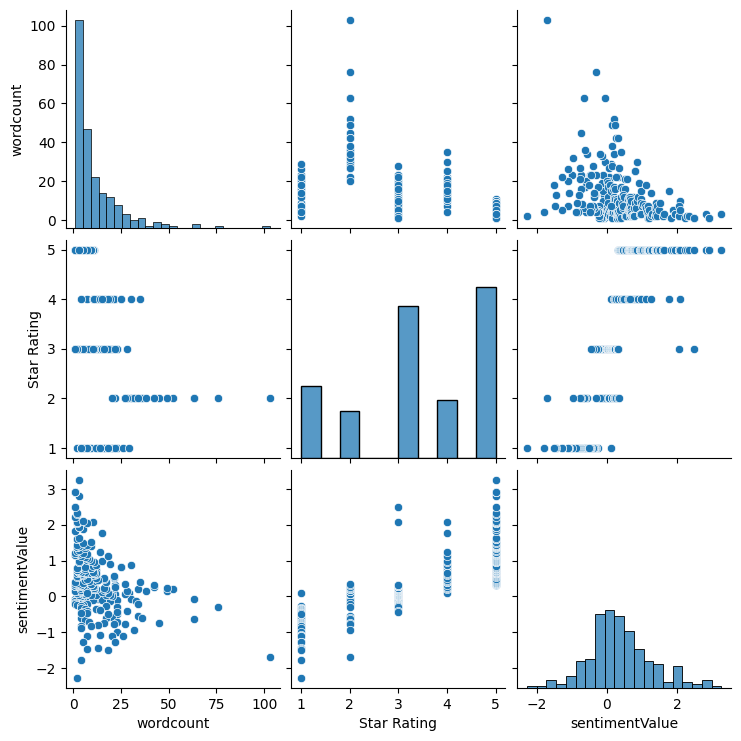

In [7]:
sns.pairplot(df)

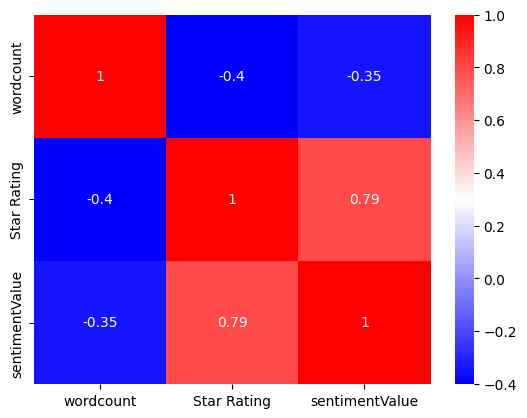

In [8]:

sns.heatmap(df.corr(numeric_only=True),
            cmap='bwr',
            annot=True);

## Preparamos el *dataset*
Divide en train/test y escala las *features* en el rango [0, 1].

Cuando se utiliza 'stratify', el conjunto de datos se divide de manera que la proporción de las clases en los conjuntos de entrenamiento y prueba sea la misma que la proporción de clases en el conjunto de datos original. Esto es útil cuando tienes clases desbalanceadas, es decir, cuando hay más ejemplos de una clase que de otr

In [47]:
X=df[['wordcount','sentimentValue']]
y=df['Star Rating']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42, stratify=y)

In [48]:
x_train.shape, x_test.shape

((205, 2), (52, 2))

In [53]:
escalado=MinMaxScaler() #minmax scaler va de 0 a 1. Con standard scaler los valores pueden sobresalir del 0 y 1.

x_train=escalado.fit_transform(x_train) #Al conjunto de entrenamiento le aplicamos el escalado.fit transform porke se ajusta al train
x_test=escalado.transform(x_test) #aqui con transforn. Al test hay que aplocar LA MISMA TRANSFORMACION DEL TRAIN.

In [54]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [55]:
x_test.min(), x_test.max()

(0.0, 0.9386062900026317)

## Creamos el Modelo
Entrena con un *KNN* y evalúa el error en *train* y en *test*

In [56]:
#Creamos un knn
knn=KNeighborsClassifier(n_neighbors=3)

#Entrenamiento
knn.fit(x_train,y_train)

#Test
y_pred=knn.predict(x_test)


## Evalúa tu modelo

In [58]:
#La tasa de acierto (scoring)
print('SCORE TRAIN: ', knn.score(x_train,y_train))
#y_pred_train=knn.predict(x_train)
print('SCORE TEST: ', knn.score(x_test,y_test))

SCORE TRAIN:  0.9170731707317074
SCORE TEST:  0.9038461538461539


In [59]:
confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 1,  0, 14,  0,  1],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  2,  0, 16]], dtype=int64)

<Axes: >

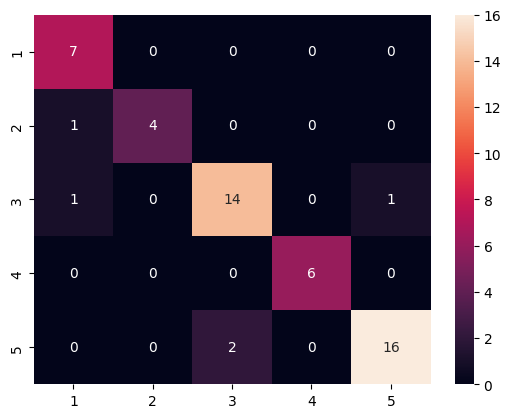

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred),
            xticklabels=[1,2,3,4,5], 
            yticklabels=[1,2,3,4,5],  
            annot=True)

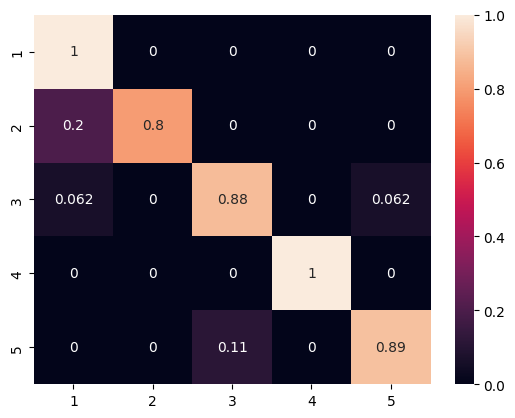

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), 
            xticklabels=[1,2,3,4,5],#np.unique(y_pred), 
            yticklabels=[1,2,3,4,5], # np.unique(y_pred), 
            annot=True);

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el *accuracy*? Representa todas las iteraciones en un *scatterplot* -> k vs *accuracy*

In [61]:
#Creamos un knn
knn=KNeighborsClassifier()

#Hacemos un Gridsearch con cross validation
parametros={'n_neighbors':[3,4,5,7,9,11]}
grid=GridSearchCV(knn,parametros,cv=5)

#Entrenamiento
grid.fit(x_train,y_train)

#Mejor modelo y mejores parametros
best_grid=grid.best_estimator_
best_params=grid.best_params_
print("Mejores parámetros:", best_params)

#Test
y_pred=best_grid.predict(x_test)

#Resultado: acuracy
print('Accuracy Test: ', accuracy_score(y_test,y_pred))
y_pred_train=best_grid.predict(x_train)
print('Accuracy Train: ', accuracy_score(y_train,y_pred_train))


Mejores parámetros: {'n_neighbors': 4}
Accuracy Test:  0.8846153846153846
Accuracy Train:  0.9073170731707317


Text(0.5, 0, 'k')

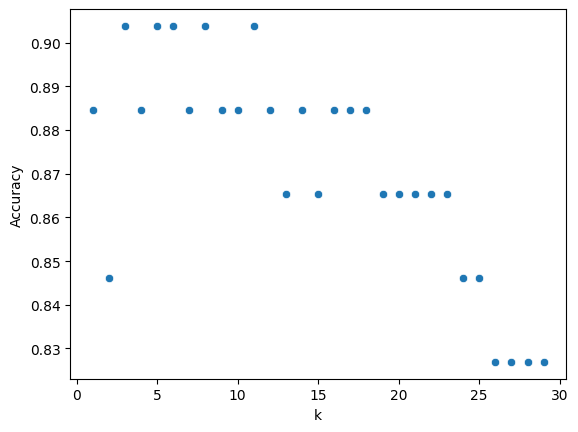

In [62]:
k=range(1,30)
acuracy_list=[]

for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scores=knn.score(x_test,y_test)
    acuracy_list.append(scores)


sns.scatterplot(y=acuracy_list, x=k)
plt.ylabel('Accuracy')
plt.xlabel('k')

In [22]:
np.max(scores)

0.8269230769230769

In [71]:
acuracy_list

[0.8846153846153846,
 0.8461538461538461,
 0.9038461538461539,
 0.8846153846153846,
 0.9038461538461539,
 0.9038461538461539,
 0.8846153846153846,
 0.9038461538461539,
 0.8846153846153846,
 0.8846153846153846,
 0.9038461538461539,
 0.8846153846153846,
 0.8653846153846154,
 0.8846153846153846,
 0.8653846153846154,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8653846153846154,
 0.8461538461538461,
 0.8461538461538461,
 0.8269230769230769,
 0.8269230769230769,
 0.8269230769230769,
 0.8269230769230769]

In [70]:
acuracy_list.index(max(acuracy_list))

2

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una *review* de 5 palabras y sentimiento 1

In [72]:
df.head(2)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187


In [26]:
nuevo={'wordcount':[5], 'sentimentValue':[5]}

nuevo_df=pd.DataFrame(nuevo)
nuevo_df

,wordcount,sentimentValue
0,5,5


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
new_review_scal = escalado.transform(nuevo_df)
prediction = knn.predict(new_review_scal)
print(prediction)

[5]
